In [353]:
import numpy as np
import scipy
import scipy.integrate
from scipy.special import erf
import matplotlib.pyplot as plt
import os

# os.chdir('/Users/kcoppess/muspelheim/quail_volcano/src/')

# import compressible_conduit_steady.steady_state as SS
# import compressible_conduit_steady.material_properties as matprops

# os.chdir('/Users/kcoppess/muspelheim/quail_ODESS_map/')

import steady_state as SS
import material_properties as matprops

In [354]:
Numerics = {
  # Solution order; these correspond to:
  # 0: 1 node in each element representing the average value
  # 1: 2 nodes in each element constituting a linear representation of the
  #    solution in the element
  # 2: 3 nodes in each element constituting a quadratic representation of the
  #    solution in the element
  "SolutionOrder" : 2,
#   "SolutionBasis" : "LagrangeSeg",
#   "Solver" : "DG",
#   "ApplyLimiters" : "PositivityPreservingMultiphasevpT",
#   "ElementQuadrature" : "GaussLegendre",
#   "FaceQuadrature" : "GaussLegendre",
#   # Artificial viscosity adds a diffusion term to all equations, where the                                                                                                                              
#   # strong form residual is large and where the pressure gradient relative to
#   # hydrostatic is large
#   "ArtificialViscosity" : True,
#   "AVParameter" : 0.3,
#   # If L2InitialCondition is false, use interpolation instead of L2 projection of Riemann data
#   'L2InitialCondition': False,
}

# Mesh = {
# #     "File" : None,
# #     "ElementShape" : "Segment",
#     # Use even number if using initial condition with discontinuous pressure
#     "NumElemsX" : 3000, 
#     "xmin" : -3000.0 - 150.0,
#     "xmax" : 0.0 - 150.0,
# }

Mesh = {
#     "File" : None,
#     "ElementShape" : "Segment",
    # Use even number if using initial condition with discontinuous pressure
    "NumElemsX" : 2000, 
    "xmin" : -2000.0 - 150.0,
    "xmax" : 0.0 - 150.0,
}

In [436]:
n_elems_per_part = Mesh["NumElemsX"]
n_elems_global = 2*n_elems_per_part
if Numerics["SolutionOrder"] == 0:
    n_nodes_global = n_elems_global
elif Numerics["SolutionOrder"] == 1:
    n_nodes_global = n_elems_global + 1
elif Numerics["SolutionOrder"] == 2:
    n_nodes_global = 2*n_elems_global + 1
else:
    raise ValueError("Oops, is there solution order > 2?")
x_global = np.linspace(Mesh["xmin"], Mesh["xmax"], n_nodes_global)

phi_crys = 0.4 * (1.1 - 0.1 * np.cos(0.0)) #0.4025 * (1.1 - 0.1 * np.cos(0.0))
chi_water = 0.05 #0.05055
yWt_init = chi_water * (1 - phi_crys) / (1 + chi_water)
yC_init = phi_crys

p_vent = 1e5          # Vent pressure
inlet_input_val = 3 # Inlet velocity; see also BoundaryCondition["x1"]
input_type = "u"

n0 = chi_water
Sm = 5e-6

# Old test properties
# props = {
#     "yC": yC_init,
#     "yWt": yWt_init,
#     "yA": 1e-7,
#     "yWvInletMin": 1e-5,
#     "yCMin": 1e-5,
#     "crit_volfrac": 0.7,
#     "tau_d": 1.0,
#     "tau_f": 1.0,
#     "conduit_radius": 50,
#     "T_chamber": 1000,
#     "c_v_magma": 3e3,
#     "rho0_magma": 2.6e3,
#     "K_magma": 10e9,
#     "p0_magma": (n0 / Sm)**2,
#     "solubility_k": Sm,
#     "solubility_n": 0.5,
#     "neglect_edfm": True,
# }

# Target test properties
props = {
    "yC": yC_init,
    "yWt": yWt_init,
    "yA": 1e-7,
    "yWvInletMin": 1e-5,
    "yCMin": 1e-5,
    "crit_volfrac": 0.7,
    "tau_d": 1.0,
    "tau_f": 1.0,
    "conduit_radius": 50,
    "T_chamber": 1023,
    "c_v_magma": 3e3,
    "rho0_magma": 2.6e3,
    "K_magma": 10e9,
    "p0_magma": (n0 / Sm)**2,
    "solubility_k": Sm,
    "solubility_n": 0.5,
    "neglect_edfm": True,
}

In [416]:
x1 = x_global.copy()
x_quail = np.expand_dims(x1, axis=(1, 2))
p_range = np.linspace(20e6, 100e6, 8)

In [417]:
import steady_state as SS
# Build steady state object
# f = SS.SteadyState(x1, p_vent, 175e6, input_type='p', override_properties=props)
# # Retrieve solve_ivp parameters
# f._DEBUG = True
# f.solve_ssIVP(100e6, 2400)
# f.ivp_inputs

In [418]:
p_vent

100000.0

In [437]:
f1 = SS.SteadyState(x1, p_vent, 55e6, input_type='p', override_properties=props)
# f5 = SS.SteadyState(x1, p_vent, 60e6, input_type='p', override_properties=props)

c:\Users\Fredric\Documents\Volcano\quail_volcano\src\compressible_conduit_steady\material_properties.py:168: RuntimeWarning: invalid value encountered in log
  return self.K/self.rho0 * (u - np.log(1 + u))


262805.00870775006 and 262805.01201778336
-0.1 and -0.1
Computed choking mass flux: 2352.014518141326; choking pressure: 262805.01026034646.
Choked at vent.


In [359]:
f = SS.SteadyState(x1, p_vent, 60e6, input_type='p', override_properties=props)

64546.76681416177 and 58452.963895425506
1.0017967194998194 and -0.1
Computed choking mass flux: 670.2740478815813; choking pressure: 58453.01785244965.
Subsonic flow at vent. Shooting method for correct value of z.
Solution j0 found. Computing solution.


In [360]:
# Set range of inlet pressures and mass fluxes j0 to try
forward_p = np.linspace(5e5, 250e6, 230//4)
forward_j0 = np.linspace(10, 8000, 200)
mg_p, mg_j0 = np.meshgrid(forward_p, forward_j0)
out = SS.parallel_forward_map(f, mg_p, mg_j0, num_processes=12)

Decomposition coordinates: (M/j0) <-> p; ODE x <-> p


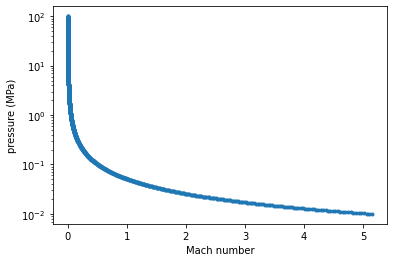

In [242]:
''' Isothermal, tau_f = 0 = tau_d '''
T0 = 1000
j0 = 580
M_p = lambda p: j0 * f.v_mix(p, T0, f.y_wv_eq(p)) \
  / f.mixture.sound_speed(p, T0, f.yA, f.y_wv_eq(p), 1.0 - f.yA - f.y_wv_eq(p))
p_isoTlimit = np.logspace(np.log10(0.1e5), np.log10(100e6), 1000)
M_isoTlimit = np.array([M_p(p) for p in p_isoTlimit])
plt.semilogy(M_isoTlimit, p_isoTlimit/1e6, '.-')

plt.xlabel("Mach number")
plt.ylabel("pressure (MPa)")
print("Decomposition coordinates: (M/j0) <-> p; ODE x <-> p")

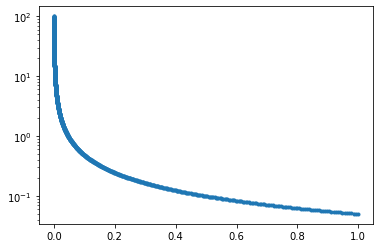

In [250]:
''' Collapse limit curve '''
T0 = 1000
j0 = 1145.6895566362828
M_p = lambda p: j0 * f.v_mix(p, T0, f.y_wv_eq(p)) \
  / f.mixture.sound_speed(p, T0, f.yA, f.y_wv_eq(p), 1.0 - f.yA - f.y_wv_eq(p))
p_isoTlimit = np.logspace(np.log10(0.5e5), np.log10(100e6), 1000)
M_isoTlimit = np.array([M_p(p) for p in p_isoTlimit])
plt.semilogy(M_isoTlimit/M_isoTlimit.max(), p_isoTlimit/1e6, '.-')

In [268]:
x_generous = np.linspace(x1[0], x1[0]+5000)
f = SS.SteadyState(x_generous, p_vent, 60e6, input_type='p', override_properties=props)

c:\Users\Fredric\Documents\Volcano\quail_volcano\src\compressible_conduit_steady\material_properties.py:168: RuntimeWarning: invalid value encountered in log
  return self.K/self.rho0 * (u - np.log(1 + u))


26471.54024698753 and 26567.231434504818
1.002386729214225 and 1.0023541960645372
Computed choking mass flux: 294.18114773025707; choking pressure: 25834.377648173504.
Subsonic flow at vent. Shooting method for correct value of z.
Solution j0 found. Computing solution.


In [272]:
T0 = 1000
M_p_on_j0 = lambda p: f.v_mix(p, T0, f.y_wv_eq(p)) \
  / f.mixture.sound_speed(p, T0, f.yA, f.y_wv_eq(p), 1.0 - f.yA - f.y_wv_eq(p))
p_isoTlimit = np.logspace(np.log10(0.5e5), np.log10(100e6), 1000)
M_isoTlimit = np.array([M_p(p) for p in p_isoTlimit])

In [316]:
props2 = props.copy()
props2["tau_d"] = 1
props2["tau_f"] = 1
x_generous = np.linspace(x1[0], x1[0]+5000)
f = SS.SteadyState(x_generous, p_vent, 60e6, input_type='p', override_properties=props2)

c:\Users\Fredric\Documents\Volcano\quail_volcano\src\compressible_conduit_steady\material_properties.py:168: RuntimeWarning: invalid value encountered in log
  return self.K/self.rho0 * (u - np.log(1 + u))


26471.54024698753 and 26567.231434504818
1.002386729214225 and 1.0023541960645372
Computed choking mass flux: 294.18114773025707; choking pressure: 25834.377648173504.
Subsonic flow at vent. Shooting method for correct value of z.
Solution j0 found. Computing solution.


In [332]:
f.ivp_inputs[0:1]

(<function steady_state.SteadyState.solve_ssIVP.<locals>.AinvRHS(x, q, vectorized=False)>,)

c:\Users\Fredric\Documents\Volcano\quail_volcano\src\compressible_conduit_steady\material_properties.py:93: RuntimeWarning: divide by zero encountered in double_scalars
  return self.R * T / p
c:\Users\Fredric\Documents\Volcano\quail_volcano\src\compressible_conduit_steady\material_properties.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  self.dT_dp(p, None, yA, yWv, yM) / T - 1.0 / p)
c:\Users\Fredric\Documents\Volcano\quail_volcano\src\compressible_conduit_steady\steady_state.py:242: RuntimeWarning: invalid value encountered in double_scalars
  _q2 = np.sqrt(_q1**2 + 4 * (1 + _q1 + v * j0**2 * self.dv_dh(p, T, y)))


81343.76888741367


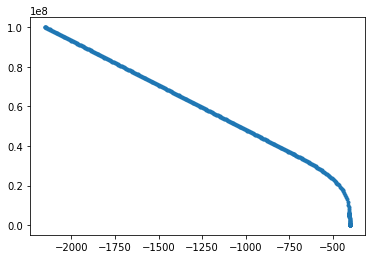

In [352]:
f._DEBUG = True
_ = f.solve_ssIVP(100e6, 1.0 / M_p_on_j0(1e5))
f.ivp_inputs

with warnings.catch_warnings():
  warnings.simplefilter("ignore")


  soln = scipy.integrate.solve_ivp(f.ivp_inputs[0], #AinvRHS,
  f.ivp_inputs[1], #(self.x_mesh[0],self.x_mesh[-1]),
  f.ivp_inputs[2], #q0,
  # t_eval=self.x_mesh,
  method="BDF", # method="Radau",
  dense_output=True,
  events=f.ivp_inputs[5], max_step=5.0
  )
  plt.plot(soln.t, soln.y[0,:], '.-')
  print(soln.y[0,-1])

In [325]:
soln.y_events

[array([[8.13573781e+04, 2.97349424e+06, 1.10168807e-02, 5.03876816e-01]]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64)]

c:\Users\Fredric\Documents\Volcano\quail_volcano\src\compressible_conduit_steady\material_properties.py:93: RuntimeWarning: divide by zero encountered in double_scalars
  return self.R * T / p
c:\Users\Fredric\Documents\Volcano\quail_volcano\src\compressible_conduit_steady\material_properties.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  self.dT_dp(p, None, yA, yWv, yM) / T - 1.0 / p)
c:\Users\Fredric\Documents\Volcano\quail_volcano\src\compressible_conduit_steady\steady_state.py:242: RuntimeWarning: invalid value encountered in double_scalars
  _q2 = np.sqrt(_q1**2 + 4 * (1 + _q1 + v * j0**2 * self.dv_dh(p, T, y)))


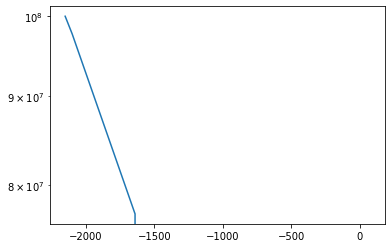

In [347]:
_soln = f.solve_ssIVP(100e6, 1.0 / M_p_on_j0(1e5))
plt.semilogy(_soln[0], _soln[1][0,:])


In [428]:
props

{'yC': 0.4,
 'yWt': 0.02857142857142857,
 'yA': 1e-07,
 'yWvInletMin': 1e-05,
 'yCMin': 1e-05,
 'crit_volfrac': 0.7,
 'tau_d': 1.0,
 'tau_f': 1.0,
 'conduit_radius': 50,
 'T_chamber': 1000,
 'c_v_magma': 3000.0,
 'rho0_magma': 2600.0,
 'K_magma': 10000000000.0,
 'p0_magma': 100000000.0,
 'solubility_k': 5e-06,
 'solubility_n': 0.5,
 'neglect_edfm': True}

In [ ]:
# Design tool
T0 = 1000
M_p_on_j0 = lambda p: f.v_mix(p, T0, f.y_wv_eq(p)) \
  / f.mixture.sound_speed(p, T0, f.yA, f.y_wv_eq(p), 1.0 - f.yA - f.y_wv_eq(p))

# Target vent pressure of 1e5
j0 = 1.0 / M_p_on_j0(1e5)

# Set input chamber pressures
pc_vec = np.linspace(60e6,100e6,30)
L = np.zeros_like(pc_vec)
# Compute length corresponding to input quantities
for i, pc in enumerate(pc_vec):
  _soln = f.solve_ssIVP(pc, 1.0 / M_p_on_j0(1e5))
  L[i] = np.diff(_soln[0][[0,-1]])
  plt.semilogy(_soln[0], _soln[1][0,:])

plt.figure()
plt.plot(pc_vec, L, '.-')

In [374]:
j0 = 1.0 / M_p_on_j0(1e5)
for i in range(5):
  _soln = f.solve_ssIVP(pc_vec[0], j0)
  p_fpi = 1e5 + (1e5 - _soln[1][0,-1])
  j0 = 1.0 / M_p_on_j0(p_fpi)
  print(p_fpi)

118627.85776246658
104678.30811884406
115120.06603079787
107300.77034805097
113153.65843757476


In [378]:
scipy.optimize.newton(lambda j0: f.solve_ssIVP(pc_vec[0], j0)[1][0,-1] - 1e5, 1.0 / M_p_on_j0(p_fpi))

1435.5578980638243

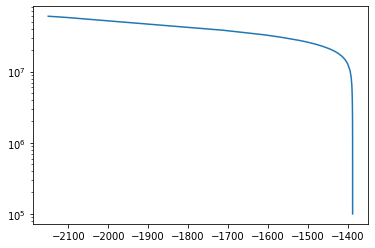

In [381]:
_soln = f.solve_ssIVP(pc_vec[0], 1435.5578980638243)
plt.semilogy(_soln[0], _soln[1][0,:])

In [414]:
props

{'yC': 0.4,
 'yWt': 0.017475728155339803,
 'yA': 1e-07,
 'yWvInletMin': 1e-05,
 'yCMin': 1e-05,
 'crit_volfrac': 0.7,
 'tau_d': 1.0,
 'tau_f': 1.0,
 'conduit_radius': 50,
 'T_chamber': 1000,
 'c_v_magma': 3000.0,
 'rho0_magma': 2600.0,
 'K_magma': 10000000000.0,
 'p0_magma': 35999999.99999999,
 'solubility_k': 5e-06,
 'solubility_n': 0.5,
 'neglect_edfm': True}

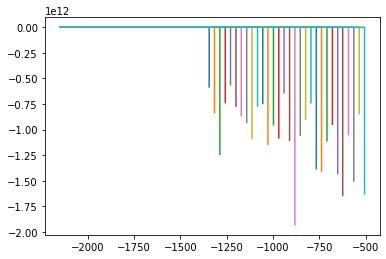

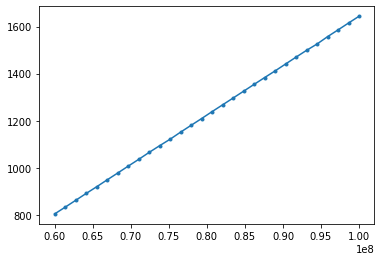

In [385]:
# Design tool
f._DEBUG = True
T0 = 1000
M_p_on_j0 = lambda p: f.v_mix(p, T0, f.y_wv_eq(p)) \
  / f.mixture.sound_speed(p, T0, f.yA, f.y_wv_eq(p), 1.0 - f.yA - f.y_wv_eq(p))

# Set input chamber pressures
pc_vec = np.linspace(60e6,100e6,30)
L = np.zeros_like(pc_vec)
# Compute length corresponding to input quantities
for i, pc in enumerate(pc_vec):
  _soln = f.solve_ssIVP(pc, j0)
  L[i] = np.diff(_soln[0][[0,-1]])
  plt.plot(_soln[0][1:], np.diff(_soln[1][0,:])/np.diff(_soln[0]))

plt.figure()
plt.plot(pc_vec, L, '.-')

In [392]:
_soln[0].shape

(89,)

In [397]:
pgrad = np.array([f.ivp_inputs[0](0, _soln[1][:,i])[0]
  for i in range(_soln[0].size)])

In [406]:
f.T_ph(_soln[1][0,i], _soln[1][1,i], _soln[1][2,i])

IndexError: index 11399 is out of bounds for axis 1 with size 89

In [413]:
_soln[1][0,:]

array([1.00000000e+08, 9.99784310e+07, 9.97627409e+07, 9.76058592e+07,
       7.60389281e+07, 4.03762919e+07, 3.59185829e+07, 3.50156525e+07,
       3.40886260e+07, 3.31341723e+07, 3.10013388e+07, 2.88520737e+07,
       2.58377344e+07, 2.21224345e+07, 2.05103138e+07, 1.97764789e+07,
       1.82206646e+07, 1.63119476e+07, 1.52080621e+07, 1.46556747e+07,
       1.36483753e+07, 1.24246134e+07, 1.15347065e+07, 1.11110064e+07,
       1.03362612e+07, 9.39364509e+06, 8.55624973e+06, 8.20114186e+06,
       7.47409399e+06, 6.56225459e+06, 5.69148763e+06, 5.55484576e+06,
       5.42462301e+06, 5.28892665e+06, 5.23012924e+06, 5.10917794e+06,
       5.09755316e+06, 5.09289128e+06, 5.09251803e+06, 5.09177140e+06,
       5.09171166e+06, 5.09168777e+06, 5.09166387e+06, 5.09142492e+06,
       5.08903524e+06, 5.06512558e+06, 4.82438955e+06, 3.91349376e+06,
       3.35868837e+06, 3.11477638e+06, 2.73299048e+06, 2.29031271e+06,
       1.99144654e+06, 1.87051999e+06, 1.64317512e+06, 1.37845295e+06,
      

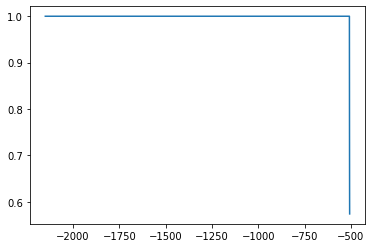

In [412]:
# plt.plot(f.F_fric_viscosity_model(f.T_ph(_soln[1][0,:], _soln[1][1,:], _soln[1][2,:]), _soln[1][2,:], _soln[1][3,:]))
# plt.plot(f.T_ph(_soln[1][0,:], _soln[1][1,:], _soln[1][2,:]))
# plt.plot(_soln[1][3,:])
plt.plot(_soln[0], np.clip(1.0 - _soln[1][3,:]/(1.0 - _soln[1][2,:] - f.yA), 0.0, 1.0))

In [420]:
f.F_fric_viscosity_model(f.T_ph(_soln[1][0,:], _soln[1][1,:], _soln[1][2,:]), _soln[1][2,:], _soln[1][3,:])

array([1.38597676e+07, 1.38597678e+07, 1.38597690e+07, 1.38597818e+07,
       1.38599278e+07, 1.38602981e+07, 1.38923584e+07, 1.46401459e+07,
       1.54906978e+07, 1.64451853e+07, 1.89114966e+07, 2.19788550e+07,
       2.76553843e+07, 3.81090683e+07, 4.44987335e+07, 4.79301089e+07,
       5.65901197e+07, 7.06388741e+07, 8.11389327e+07, 8.72376061e+07,
       1.00125600e+08, 1.19602829e+08, 1.37120268e+08, 1.46661478e+08,
       1.66432076e+08, 1.95185916e+08, 2.25781286e+08, 2.40349606e+08,
       2.73335608e+08, 3.20856103e+08, 3.72292163e+08, 3.80834517e+08,
       3.89078342e+08, 3.97767898e+08, 4.01562473e+08, 4.09419999e+08,
       4.10178680e+08, 4.10483099e+08, 4.10507475e+08, 4.10556240e+08,
       4.10560142e+08, 4.10561702e+08, 4.10563263e+08, 4.10578871e+08,
       4.10735027e+08, 4.12304094e+08, 4.28760298e+08, 5.00205307e+08,
       5.48308157e+08, 5.69784058e+08, 6.03050327e+08, 6.40058639e+08,
       6.63522865e+08, 6.72596963e+08, 6.88970891e+08, 7.06976052e+08,
      

In [427]:
props

{'yC': 0.4,
 'yWt': 0.02857142857142857,
 'yA': 1e-07,
 'yWvInletMin': 1e-05,
 'yCMin': 1e-05,
 'crit_volfrac': 0.7,
 'tau_d': 1.0,
 'tau_f': 1.0,
 'conduit_radius': 50,
 'T_chamber': 1000,
 'c_v_magma': 3000.0,
 'rho0_magma': 2600.0,
 'K_magma': 10000000000.0,
 'p0_magma': 100000000.0,
 'solubility_k': 5e-06,
 'solubility_n': 0.5,
 'neglect_edfm': True}

Text(0, 0.5, 'Depth (m)')

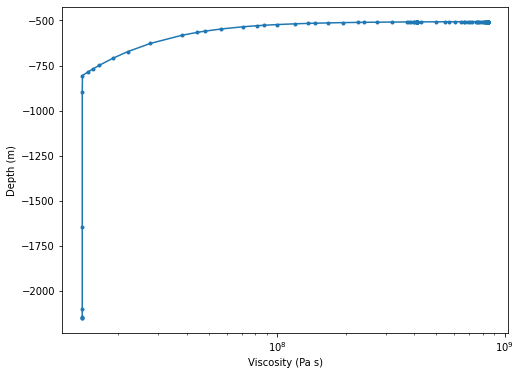

In [426]:
plt.figure(figsize=(8,6))
plt.semilogx(f.F_fric_viscosity_model(f.T_ph(_soln[1][0,:], _soln[1][1,:], _soln[1][2,:]), _soln[1][2,:], _soln[1][3,:]),
  _soln[0], '.-')
plt.xlabel("Viscosity (Pa s)")
plt.ylabel("Depth (m)")

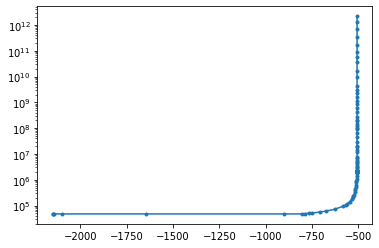

In [404]:
plt.semilogy(_soln[0], -pgrad, '.-')

In [398]:
''' Choked flow curve sampling (get inlet pressures that are closest to choking
    in samples)'''
# Set filter for row indices that have both subsonic and choked flow
has_choking_filter = np.asarray(~np.all(out["x_top"] >= -150, axis=0) 
         & ~np.all(out["x_top"] < -150, axis=0)).nonzero()[0]
# Get row index of first choked flow given that there is both subsonic + choked
i_choked = np.clip(np.argmin(out["x_top"] >= -150, axis=0)-1,0,None)[has_choking_filter]
# Column index (input mass flux) associated with choked flow
j_choked = np.arange(mg_p.shape[1])[has_choking_filter]

# Extract associated flow values at choking
p_choked = out["p_top"][i_choked, j_choked]
vel_in_choked = out["vel_in"][i_choked, j_choked]
p_in_choked = mg_p[i_choked, j_choked]

''' Approximate exsolution and fragmentation depths '''
mg_depth_exsoln = mg_p.copy()
mg_depth_frag = mg_p.copy()
for i in range(mg_p.ravel().size):
  mg_depth_exsoln.ravel()[i] = np.interp(
    1e-3, out["results"][i][1][2,:], out["results"][i][0])
  # N.B. Below is a proxy, since 50% of total mass includes exsolved water
  mg_depth_frag.ravel()[i] = np.interp(
    0.5, out["results"][i][1][3,:], out["results"][i][0])



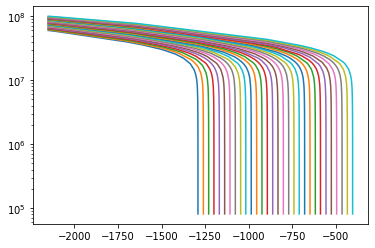

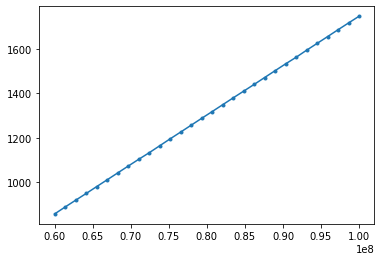

In [369]:
import warnings

with warnings.catch_warnings():
  warnings.simplefilter("ignore")

  T0 = 1000
  M_p_on_j0 = lambda p: f.v_mix(p, T0, f.y_wv_eq(p)) \
    / f.mixture.sound_speed(p, T0, f.yA, f.y_wv_eq(p), 1.0 - f.yA - f.y_wv_eq(p))

  # Target vent pressure of 1e5
  j0 = 1.0 / M_p_on_j0(1e5)

  # Set input chamber pressures
  pc_vec = np.linspace(60e6,100e6,30)
  L = np.zeros_like(pc_vec)
  # Compute length corresponding to input quantities
  for i, pc in enumerate(pc_vec):
    _soln = f.solve_ssIVP(pc, 1.0 / M_p_on_j0(1e5))
    L[i] = np.diff(_soln[0][[0,-1]])
    plt.semilogy(_soln[0], _soln[1][0,:])

  plt.figure()
  plt.plot(pc_vec, L, '.-')

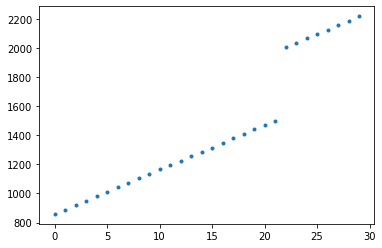

In [337]:
plt.plot(L, '.')

In [361]:
''' Choked flow curve sampling (get inlet pressures that are closest to choking
    in samples)'''
# Set filter for row indices that have both subsonic and choked flow
has_choking_filter = np.asarray(~np.all(out["x_top"] >= -150, axis=0) 
         & ~np.all(out["x_top"] < -150, axis=0)).nonzero()[0]
# Get row index of first choked flow given that there is both subsonic + choked
i_choked = np.clip(np.argmin(out["x_top"] >= -150, axis=0)-1,0,None)[has_choking_filter]
# Column index (input mass flux) associated with choked flow
j_choked = np.arange(mg_p.shape[1])[has_choking_filter]

# Extract associated flow values at choking
p_choked = out["p_top"][i_choked, j_choked]
vel_in_choked = out["vel_in"][i_choked, j_choked]
p_in_choked = mg_p[i_choked, j_choked]

''' Approximate exsolution and fragmentation depths '''
mg_depth_exsoln = mg_p.copy()
mg_depth_frag = mg_p.copy()
for i in range(mg_p.ravel().size):
  mg_depth_exsoln.ravel()[i] = np.interp(
    1e-3, out["results"][i][1][2,:], out["results"][i][0])
  # N.B. Below is a proxy, since 50% of total mass includes exsolved water
  mg_depth_frag.ravel()[i] = np.interp(
    0.5, out["results"][i][1][3,:], out["results"][i][0])



In [362]:
mg_p[i_choked, j_choked]

array([4.95535714e+06, 9.41071429e+06, 1.38660714e+07, 1.83214286e+07,
       2.27767857e+07, 2.72321429e+07, 3.16875000e+07, 3.61428571e+07,
       4.05982143e+07, 4.50535714e+07, 4.95089286e+07, 5.39642857e+07,
       5.84196429e+07, 6.28750000e+07, 6.73303571e+07, 7.17857143e+07,
       7.62410714e+07, 8.06964286e+07, 8.51517857e+07, 8.96071429e+07,
       9.40625000e+07, 9.85178571e+07, 1.02973214e+08, 1.07428571e+08,
       1.11883929e+08, 1.16339286e+08, 1.20794643e+08, 1.25250000e+08,
       1.29705357e+08, 1.34160714e+08, 1.38616071e+08, 1.43071429e+08,
       1.47526786e+08, 1.51982143e+08, 1.56437500e+08, 1.60892857e+08,
       1.65348214e+08, 1.69803571e+08, 1.74258929e+08, 1.78714286e+08,
       1.83169643e+08, 1.87625000e+08, 1.92080357e+08, 1.96535714e+08,
       2.00991071e+08, 2.05446429e+08, 2.09901786e+08, 2.14357143e+08,
       2.18812500e+08, 2.23267857e+08, 2.27723214e+08, 2.32178571e+08,
       2.36633929e+08, 2.41089286e+08, 2.45544643e+08, 2.50000000e+08])

In [69]:
''' Combined ops '''
# Set range of inlet pressures and mass fluxes j0 to try
forward_p = np.linspace(5e5, 250e6, 230//4)
forward_j0 = np.linspace(10, 8000, 400)
mg_p, mg_j0 = np.meshgrid(forward_p, forward_j0)
out = SS.parallel_forward_map(f, mg_p, mg_j0, num_processes=12)

In [363]:
''' Choked flow curve sampling (get inlet pressures that are closest to choking
    in samples)'''
# Set filter for row indices that have both subsonic and choked flow
has_choking_filter = np.asarray(~np.all(out["x_top"] >= -150, axis=0) 
         & ~np.all(out["x_top"] < -150, axis=0)).nonzero()[0]
# Get row index of first choked flow given that there is both subsonic + choked
i_choked = np.clip(np.argmin(out["x_top"] >= -150, axis=0)-1,0,None)[has_choking_filter]
# Column index (input mass flux) associated with choked flow
j_choked = np.arange(mg_p.shape[1])[has_choking_filter]

# Extract associated flow values at choking
p_choked = out["p_top"][i_choked, j_choked]
vel_in_choked = out["vel_in"][i_choked, j_choked]
p_in_choked = mg_p[i_choked, j_choked]

''' Approximate exsolution and fragmentation depths '''
mg_depth_exsoln = mg_p.copy()
mg_depth_frag = mg_p.copy()
for i in range(mg_p.ravel().size):
  mg_depth_exsoln.ravel()[i] = np.interp(
    1e-3, out["results"][i][1][2,:], out["results"][i][0])
  # N.B. Below is a proxy, since 50% of total mass includes exsolved water
  mg_depth_frag.ravel()[i] = np.interp(
    0.5, out["results"][i][1][3,:], out["results"][i][0])

Generating sonic pressure plot. For p_vent to the left of the curve, the flow should be choked.


Text(0.5, 1.0, 'Error bars: extrapolated pressure change from last two points')

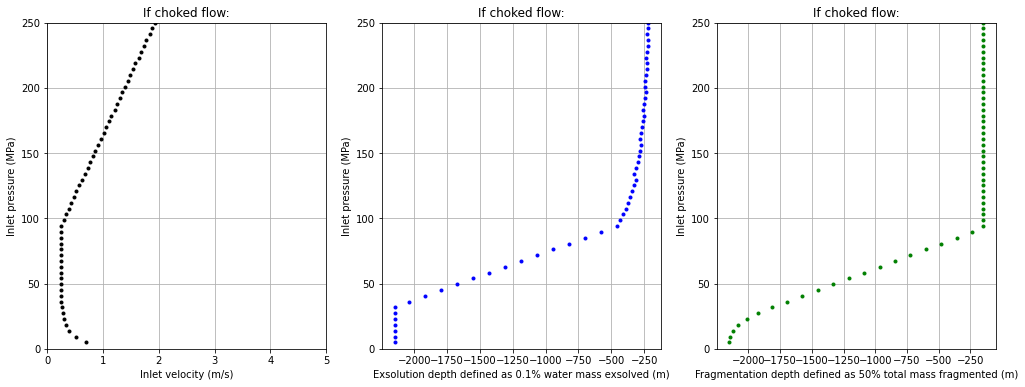

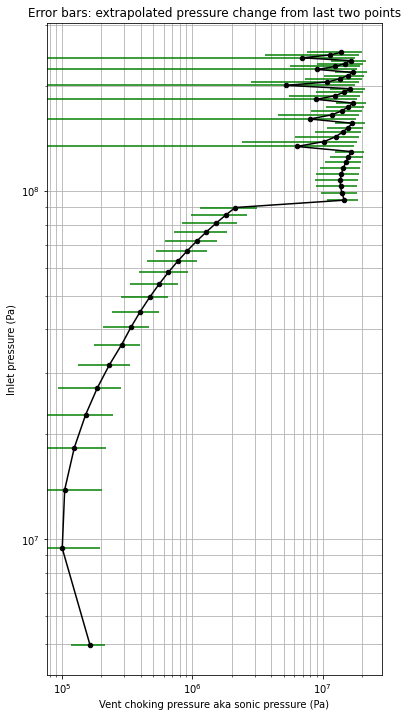

In [364]:
''' Plot p-vel relation at choking'''
plt.figure(figsize=(17,6))
plt.subplot(1,3,1)
plt.plot(vel_in_choked, p_in_choked/1e6, '.k')
plt.xlim(0, 5)
plt.xlabel("Inlet velocity (m/s)")
plt.ylabel("Inlet pressure (MPa)")
# plt.title("Inlet velocity-pressure relation at choked state")

plt.subplot(1,3,2)
plt.plot(mg_depth_exsoln[i_choked, j_choked].ravel(), p_in_choked/1e6, '.b')
plt.xlabel("Exsolution depth defined as 0.1% water mass exsolved (m)")
plt.ylabel("Inlet pressure (MPa)")

plt.subplot(1,3,3)
plt.plot(mg_depth_frag[i_choked, j_choked].ravel(), p_in_choked/1e6, '.g')
plt.ylim(0, 250)
plt.xlabel("Fragmentation depth defined as 50% total mass fragmented (m)")
plt.ylabel("Inlet pressure (MPa)")

# Format
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.grid(axis="both", which="both")
  plt.ylim(0, 250)
  plt.title("If choked flow:")

print("Generating sonic pressure plot. For p_vent to the left of the curve, " +
  "the flow should be choked.")
plt.figure(figsize=(6,12))
# Extrapolation
p_top_uncertainty = [(out["p_top"][i_choked[i]-1, j_choked[i]]
  - out["p_top"][i_choked[i], j_choked[i]]) for i in range(i_choked.size)]
plt.plot(p_choked, p_in_choked, 'k.', markersize=9)
plt.errorbar(p_choked, p_in_choked, xerr=p_top_uncertainty, color="k", ecolor="green")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Vent choking pressure aka sonic pressure (Pa)")
plt.ylabel("Inlet pressure (Pa)")
plt.grid(axis="both", which="both")
plt.title("Error bars: extrapolated pressure change from last two points")

In [ ]:
f.solve_ssIVP(f.p_chamber, 670.27)

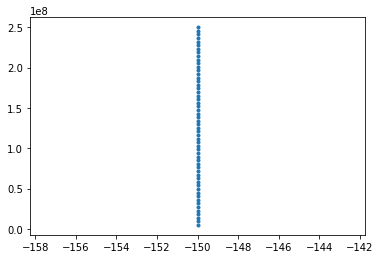

In [106]:
plt.plot(out["x_top"][i_choked, j_choked], p_in_choked, '.')

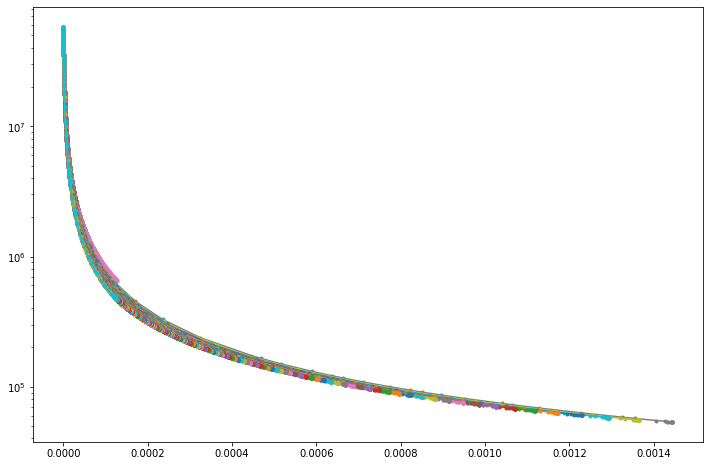

In [365]:
''' Plot M/j0, p collapse'''
# Pick p #13, all j0
plt.figure(figsize=(12,8))
for i in range(mg_p.shape[0]):
  _res = out["results"][13 + i*mg_p.shape[1]]
  _p, _h, _y, _yF = _res[1]
  _T = f.T_ph(_p, _h, _y)
  _v = f.v_mix(_p, _T, _y)
  _c = [f.mixture.sound_speed(p, T, f.yA, y, 1.0 - f.yA - y) for p, T, y in zip(_p, _T, _y)]
  _j0 = mg_j0[i,13]
  _M = mg_j0[i,13] * _v / _c

  plt.semilogy(_M/_j0, _p, '.-')
  # plt.semilogx(_p, _M, '.-')

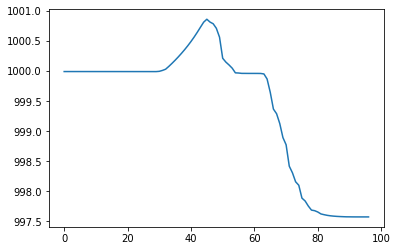

In [366]:
plt.plot(_T)

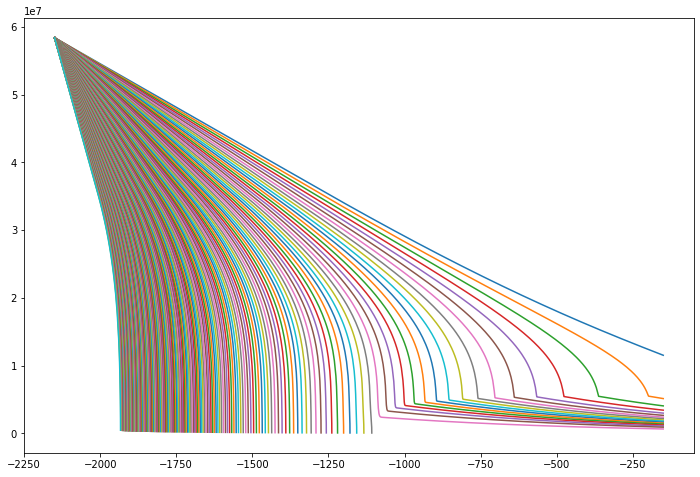

In [367]:
plt.figure(figsize=(12,8))
for i in range(mg_p.shape[0]):
  _res = out["results"][13 + i*mg_p.shape[1]]
  plt.plot(_res[0], _res[1][0])

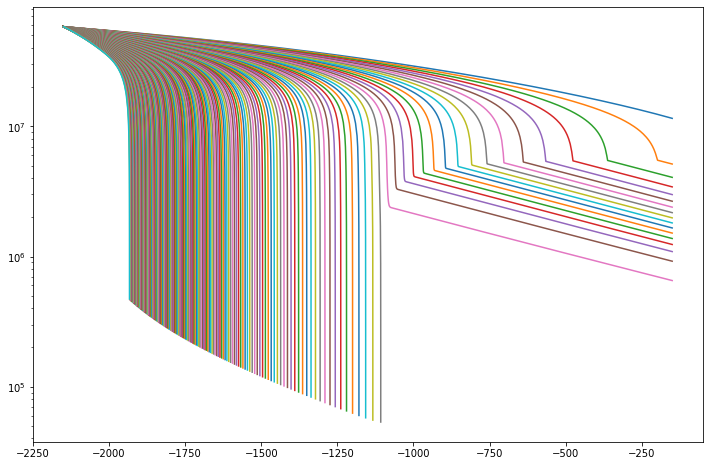

In [368]:
plt.figure(figsize=(12,8))
for i in range(mg_p.shape[0]):
  _res = out["results"][13 + i*mg_p.shape[1]]
  plt.semilogy(_res[0], _res[1][0])


In [128]:
_out[0][-1]

-150.0

In [130]:
i

0

c:\Users\Fredric\Documents\Volcano\quail_volcano\src\compressible_conduit_steady\material_properties.py:168: RuntimeWarning: invalid value encountered in log
  return self.K/self.rho0 * (u - np.log(1 + u))


Text(0, 0.5, 'Depth (m)')

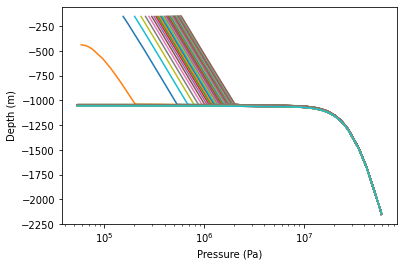

In [149]:
solve_kernel = lambda j0: f.solve_ssIVP(60e6, j0)

j_range = np.linspace(660, 680, 100)
p_top = np.zeros_like(j_range)
M_top = np.zeros_like(j_range)
for i, j0 in enumerate(j_range):
  _out = solve_kernel(j0)
  plt.semilogx(_out[1][0], _out[0])
  p_top[i] = _out[1][0][-1] if _out[0][-1] >= -150 else -1

  _T = f.T_ph(_out[1][0], _out[1][1], _out[1][2])
  _v = f.v_mix(_out[1][0], _T, _out[1][2])
  _u = j0 * _v
  _c = f.mixture.sound_speed(_out[1][0][-1], _T[-1], f.yA, _out[1][2][-1],
    1.0 - f.yA - _out[1][2][-1])
  M_top[i] = _u[-1] / _c
plt.xlabel("Pressure (Pa)")
plt.ylabel("Depth (m)")

In [160]:
f.conduit_radius

50

-15886795.990140805

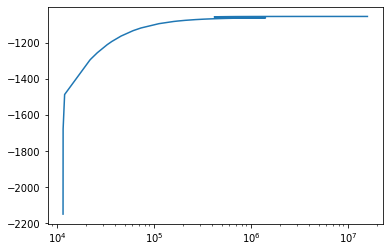

In [179]:
_T = f.T_ph(_out[1][0], _out[1][1], _out[1][2])
_v = f.v_mix(_out[1][0], _T, _out[1][2])
dpdx_fric = f.F_fric(_out[1][0], _T, _out[1][2], _out[1][3], 1.0/_v, j0*_v)
plt.semilogx(-dpdx_fric, _out[0])
dpdx_fric.min()

In [184]:
((-dpdx_fric).min() * 1e3) / 1e6

11.561179855997052

In [157]:
2600*9.8*2000

50960000.00000001

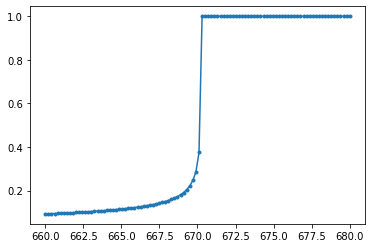

In [153]:
plt.plot(j_range, M_top, '.-')

In [156]:
f_prime = SS.SteadyState(x1, p_vent, 70e6, input_type='p', override_properties=props)

c:\Users\Fredric\Documents\Volcano\quail_volcano\src\compressible_conduit_steady\material_properties.py:168: RuntimeWarning: invalid value encountered in log
  return self.K/self.rho0 * (u - np.log(1 + u))


58449.19234591997 and 58448.97116935223
-0.1 and -0.1
Computed choking mass flux: 670.2011702461118; choking pressure: 58449.13049648604.
Subsonic flow at vent. Shooting method for correct value of z.
Solution j0 found. Computing solution.


In [48]:
np.array(p_top_uncertainty).shape, p_choked.shape

((56,), (56,))

In [118]:
# f = SS.SteadyState(x1, 1e5, 60e6, override_properties=props)
f = SS.SteadyState(x1, p_vent, 60e6, input_type='p', override_properties=props)

64546.76681416177 and 58452.963895425506
1.0017967194998194 and -0.1
Computed choking mass flux: 670.2740478815813; choking pressure: 58453.01785244965.
Subsonic flow at vent. Shooting method for correct value of z.
Solution j0 found. Computing solution.


In [100]:
import importlib
importlib.reload(SS)

<module 'steady_state' from 'c:\\Users\\Fredric\\Documents\\Volcano\\quail_volcano\\src\\compressible_conduit_steady\\steady_state.py'>

In [38]:
plt.plot(mg_depth_frag[i_choked, j_choked].ravel(), p_in_choked/1e6, '.g')
plt.ylim(0, 250)
plt.xlabel("Fragmentation depth defined as 50% total mass fragmented (m)")
plt.ylabel("Inlet pressure (MPa)")

NameError: name 'mg_depth_frag' is not defined

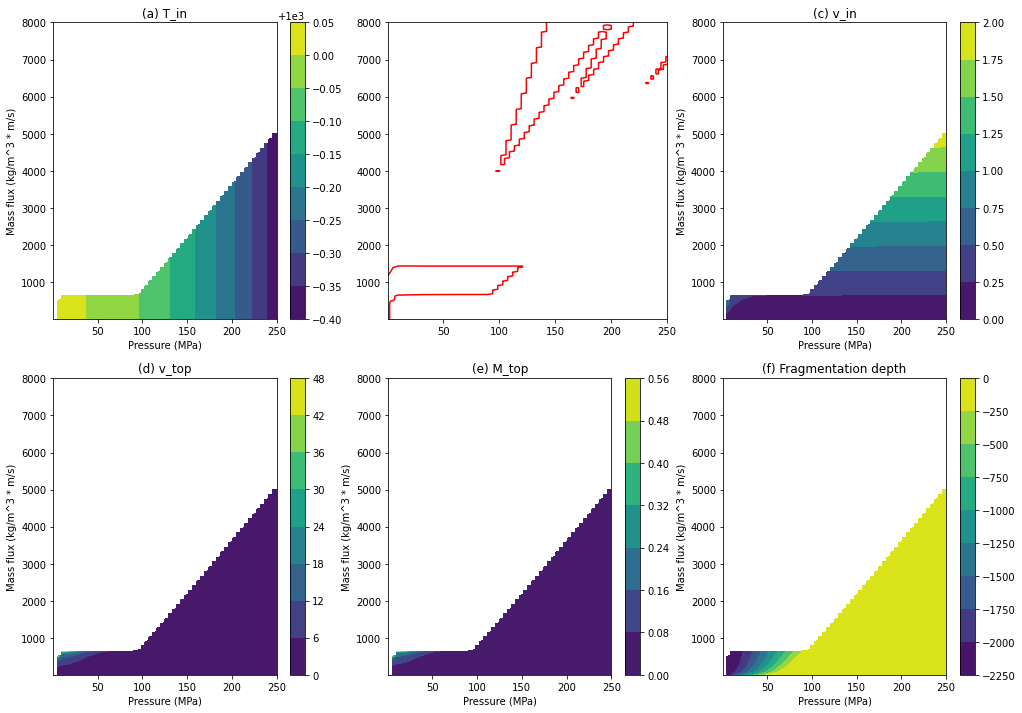

In [105]:
''' Color plots '''

# Define filter for legitimate solutions (solution extends to top)
top_boundary_filter = lambda data: np.where(out["x_top"] >= -150, data, np.nan)

# plt.figure(figsize=(12,6))
# plt.subplot(1,2,1)
# plt.contourf(mg_p/1e6, mg_j0, out["x_top"])
# plt.xlabel("Pressure (MPa)")
# plt.ylabel("Mass flux (...)")
# cb = plt.colorbar(label="x_top")
# plt.subplot(1,2,2)
# plt.contourf(mg_p/1e6, mg_j0, top_boundary_filter(out["p_top"]))
# plt.xlabel("Pressure (MPa)")
# plt.ylabel("Mass flux (...)")
# cb = plt.colorbar(label="p I(x_top == x_target)")
# plt.title("Pressure, legit solutions only")

plt.figure(figsize=(17,12))
plt.subplot(2,3,1)
plt.contourf(mg_p/1e6, mg_j0, top_boundary_filter(out["T_in"]))
plt.title("(a) T_in")
plt.subplot(2,3,2)
plt.contourf(mg_p/1e6, mg_j0, (out["p_top"]))
plt.title("(b) p_top")
plt.subplot(2,3,3)
plt.contourf(mg_p/1e6, mg_j0, top_boundary_filter(out["vel_in"]))
# plt.contour(mg_p, mg_j0, out["vel_in"], levels=[0.5, 0.6], colors="red")
plt.title("(c) v_in")
plt.subplot(2,3,4)
plt.contourf(mg_p/1e6, mg_j0, top_boundary_filter(out["vel_top"]))
plt.title("(d) v_top")
plt.subplot(2,3,5)
plt.contourf(mg_p/1e6, mg_j0, top_boundary_filter(out["M_top"]))
plt.title("(e) M_top")
plt.subplot(2,3,6)
plt.contourf(mg_p/1e6, mg_j0, top_boundary_filter(mg_depth_frag))
plt.title("(f) Fragmentation depth")

for i in range(1,7):
  plt.subplot(2,3,i)
  plt.xlabel("Pressure (MPa)")
  plt.ylabel("Mass flux (kg/m^3 * m/s)")
  plt.colorbar()

plt.subplot(2,3,2)
plt.contour(mg_p/1e6, mg_j0, (out["p_top"]), levels=[1e5], colors="red")


## Older stuff

In [ ]:
# [plt.semilogy(x1, _f(x1, io_format="phy")[0]) for _f in solvep]

In [21]:
f1 = SS.SteadyState(x1, p_vent, 60e6, input_type='p', override_properties=props)


Choked at vent.


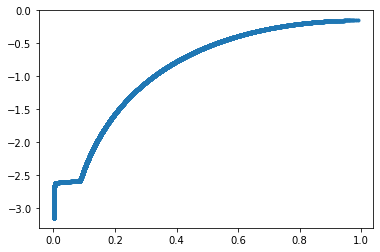

In [24]:
''' [new] plot f1 '''
soln1 = f1(x1, io_format="phy")
p1, h1, y1, yFsoln1 = soln1[0:4]
T1 = f1.T_ph(p1, h1, y1)
rho1 = 1.0 / f1.v_mix(p1, T1, y1)

soln_quail1 = f1(x_quail, io_format="quail")
u1 = f1.j0 / rho1
c_fn1 = lambda p, h, yWv: f1.mixture.sound_speed(
  p, f1.T_ph(p, h, yWv), f1.yA, yWv, 1.0 - f1.yA - yWv)
c1 = np.array(list(map(c_fn1, p1, h1, y1)))
phi1 = f1.mixture.vf_g(p1, T1, f1.yA, y1, 1.0-f1.yA-y1)

plt.plot(u1/c1, x1*1e-3, '.-', label=f'p={p1.ravel()[0]/1e6:.0f}MPa (u={u1.ravel()[0]:.4f} m/s)')

In [25]:
p1, h1, y1, yFsoln1 = soln1[0:4]
T1 = f1.T_ph(p1, h1, y1)
u1 = f1.j0 * f1.v_mix(p1, T1, y1)
u_inlet = u1[0]

In [26]:
u_inlet

0.5366082303700493

In [7]:


f1 = SS.SteadyState(x1, p_vent, 60e6, input_type='p', override_properties=props)
f5 = SS.SteadyState(x1, p_vent, 90e6, input_type='p', override_properties=props)

soln1 = f1(x1, io_format="phy")
p1, h1, y1, yFsoln1 = soln1[0:4]
T1 = f1.T_ph(p1, h1, y1)
rho1 = 1.0 / f1.v_mix(p1, T1, y1)

soln_quail1 = f1(x_quail, io_format="quail")
u1 = f1.j0 / rho1
c_fn1 = lambda p, h, yWv: f1.mixture.sound_speed(
  p, f1.T_ph(p, h, yWv), f1.yA, yWv, 1.0 - f1.yA - yWv)
c1 = np.array(list(map(c_fn1, p1, h1, y1)))
phi1 = f1.mixture.vf_g(p1, T1, f1.yA, y1, 1.0-f1.yA-y1)

drag_fn1 = lambda p1, T1, y1, yFsoln1, rho1, u1: f1.F_fric(p1, T1, y1, yFsoln1, rho1, u1)
drag1 = np.array(list(map(drag_fn1, p1, T1, y1, yFsoln1, rho1, u1)))
eta_fn1 = lambda T1, y1, yFsoln1: f1.F_fric_viscosity_model(T1, y1, yFsoln1)
eta1 = np.array(list(map(eta_fn1, T1, y1, yFsoln1)))

soln5 = f5(x1, io_format="phy")
p5, h5, y5, yFsoln5 = soln5[0:4]
T5 = f5.T_ph(p5, h5, y5)
rho5 = 1.0 / f5.v_mix(p5, T5, y5)
soln_quail5 = f5(x_quail, io_format="quail")
u5 = f5.j0 / rho5
c_fn5 = lambda p, h, yWv: f5.mixture.sound_speed(
  p, f5.T_ph(p, h, yWv), f5.yA, yWv, 1.0 - f5.yA - yWv)
c5 = np.array(list(map(c_fn5, p5, h5, y5)))
phi5 = f5.mixture.vf_g(p5, T5, f5.yA, y5, 1.0-f5.yA-y5)
drag_fn5 = lambda p1, T1, y1, yFsoln1, rho1, u1: f5.F_fric(p1, T1, y1, yFsoln1, rho1, u1)
drag5 = np.array(list(map(drag_fn5, p5, T5, y5, yFsoln5, rho5, u5)))
eta_fn5 = lambda T1, y1, yFsoln1: f5.F_fric_viscosity_model(T1, y1, yFsoln1)
eta5 = np.array(list(map(eta_fn5, T5, y5, yFsoln5)))

Choked at vent.


c:\Users\Fredric\Documents\Volcano\quail_volcano\src\compressible_conduit_steady\material_properties.py:168: RuntimeWarning: invalid value encountered in log
  return self.K/self.rho0 * (u - np.log(1 + u))


Choked at vent.


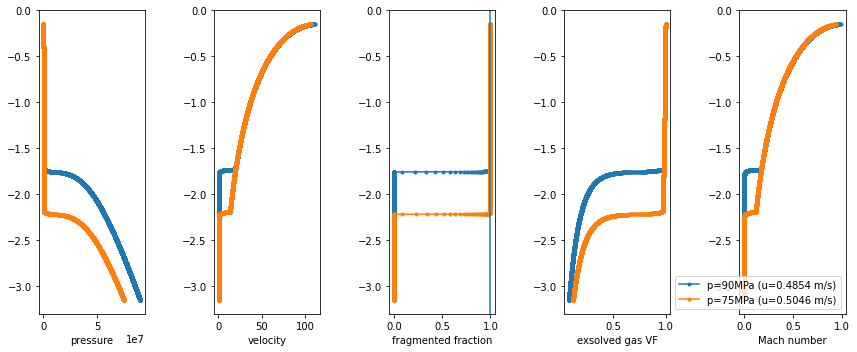

In [8]:
%matplotlib inline

x = x_global.copy()

plt.figure(figsize=(12,5))
plt.subplot(1,5,1)
plt.plot(p5, x*1e-3, '.-')
plt.plot(p1, x*1e-3, '.-')
# plt.plot(eta1 * (1 - yFsoln1 / (1.0 - y1)), x*1e-3, '.-')
# plt.plot(eta1, x*1e-3, '.-')
plt.xlabel('pressure')
plt.subplot(1,5,2)
plt.plot(u5, x*1e-3, '.-')
plt.plot(u1, x*1e-3, '.-')
plt.xlabel('velocity')
plt.subplot(1,5,3)
plt.plot(yFsoln5 / (1.0 - y5), x*1e-3, '.-')
plt.plot(yFsoln1/ (1.0 - y1), x*1e-3, '.-')
plt.axvline(1)
plt.xlabel('fragmented fraction')
plt.subplot(1,5,4)
plt.plot(phi5, x*1e-3, '.-')
plt.plot(phi1, x*1e-3, '.-')
plt.xlabel('exsolved gas VF')
plt.subplot(1,5,5)
plt.plot(u5/c5, x*1e-3, '.-', label=f'p={p5.ravel()[0]/1e6:.0f}MPa (u={u5.ravel()[0]:.4f} m/s)')
plt.plot(u1/c1, x*1e-3, '.-', label=f'p={p1.ravel()[0]/1e6:.0f}MPa (u={u1.ravel()[0]:.4f} m/s)')
plt.xlabel('Mach number')
plt.legend(loc=4)

plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/steadystate/exampleSoln1.png', dpi=300)
plt.show() 